In [1]:
# importing cell
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import odeint


# Data Generation

## Lorenz system

The first dynamical system we will explore is the renowned Lorenz system of differential equations:

$$
\begin{cases}
\dot{x} = \sigma(y-x) \\ 
\dot{y} = x(\rho - z) - y \\
\dot{z} = xy - \beta z
\end{cases}
$$

Where the parameters $\sigma, \rho, \beta$ are assumed to be positive. We will set their value to 

$$
\begin{cases}
\sigma = 10 \\ 
\rho = 28 \\ 
\beta = \frac{8}{3}
\end{cases}
$$

These are the values used originally by Lorenz, and they spawn chaotic solutions that will almost always (depending on the initial condition) tend to an invariant set, the Lorenz attractor:

In [2]:
def lorenz(r,t,sigma,rho,beta):
    """
    Function to implement the Lorenz system of differential equation. Takes in two arguments:
    r : array of 3 floats representing (x,y,z)
    t : float for time value; unused by the Lorenz system but here for scipy compatibility.
    sigma :
    rho :
    beta : parameters (float)
    Returns:
    drdt : velocity vector
    """
    x,y,z = r
    return np.array([sigma*(y-x),x*(rho-z) - y,x*y - beta*z])

sigma = 10
rho = 28
beta = 8/3

r0 = np.ones(3)

N = 10000
T = 100

t = np.linspace(0,T,N)


We will use `scipy`'s `odeint` routine, which solves systems of ordinary differential equations using Isoda from FORTRAN's library.

In [3]:
r,info = odeint(lorenz,r0,t,args=(sigma,rho,beta),full_output=True) # output is like (N,3)

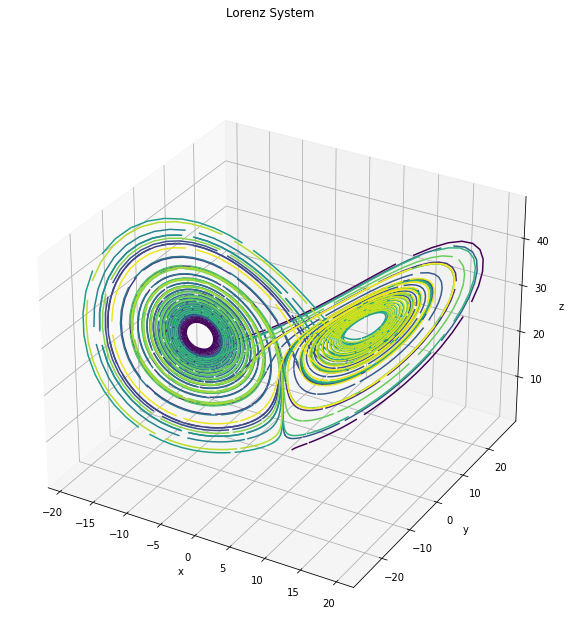

In [4]:
fig = plt.figure(figsize=[10,10])
fig.suptitle("Lorenz System")
ax = fig.add_subplot(projection='3d')
ax.set(xlabel='x',ylabel='y',zlabel='z')
j = 10

viridis = cm.get_cmap('viridis', N).colors

for i in range(0,N,j):
    ax.plot(r[i:i+j,0],r[i:i+j,1],r[i:i+j,2],color=viridis[i])


In [5]:
! mkdir -p data
np.save("./data/lorenz_r",r)
np.save("./data/lorenz_t",t)

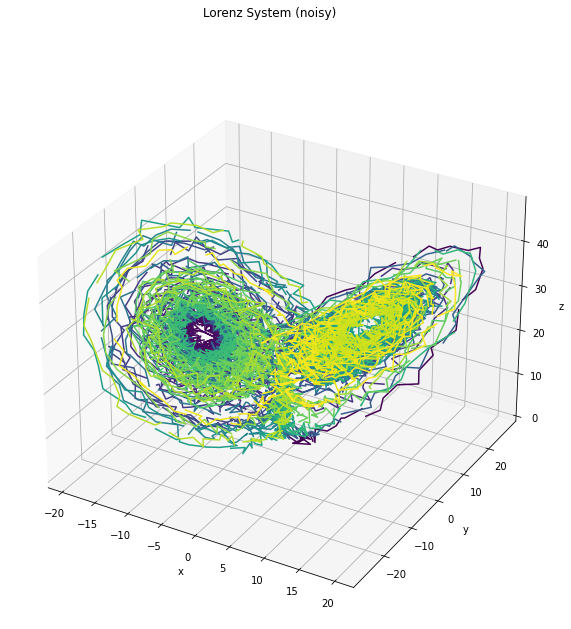

In [6]:
# NOISY SYSTEM

noise_scale = 0.7
r_noisy = r + np.random.normal(0,noise_scale,size=r.shape)

fig = plt.figure(figsize=[10,10])
fig.suptitle("Lorenz System (noisy)")
ax = fig.add_subplot(projection='3d')
ax.set(xlabel='x',ylabel='y',zlabel='z')
j = 10

viridis = cm.get_cmap('viridis', N).colors

for i in range(0,N,j):
    ax.plot(r_noisy[i:i+j,0],r_noisy[i:i+j,1],r_noisy[i:i+j,2],color=viridis[i])

In [7]:
! mkdir -p data
np.save("./data/lorenz_r_noisy",r)

## Rössler system

The second dynamical system we will explore is the Rössler system of differential equations:

$$
\begin{cases}
\dot{x} = -y -z \\ 
\dot{y} = x+ay \\
\dot{z} = b + z(x-c)
\end{cases}
$$

with parameters $a, b, c$ set as follow:

$$
\begin{cases}
a = 0.1 \\ 
b = 0.1 \\ 
c = 14
\end{cases}
$$

In [8]:
def rossler(r,t,a,b,c):
    """
    Function to implement the rossler system of differential equation. Takes in two arguments:
    r : array of 3 floats representing (x,y,z)
    t : float for time value; unused by the rossler system but here for scipy compatibility.
    a :
    b :
    c : parameters (float)
    Returns:
    drdt : velocity vector
    """
    x,y,z = r
    return np.array([-(y+z) ,x+a*y,b+z*(x-c)])

a = 0.1
b = 0.1
c = 14.

r0 = np.ones(3)

N = 10000
T = 100

t = np.linspace(0,T,N)


In [9]:
r,info = odeint(rossler,r0,t,args=(a,b,c),full_output=True) # output is like (N,3)

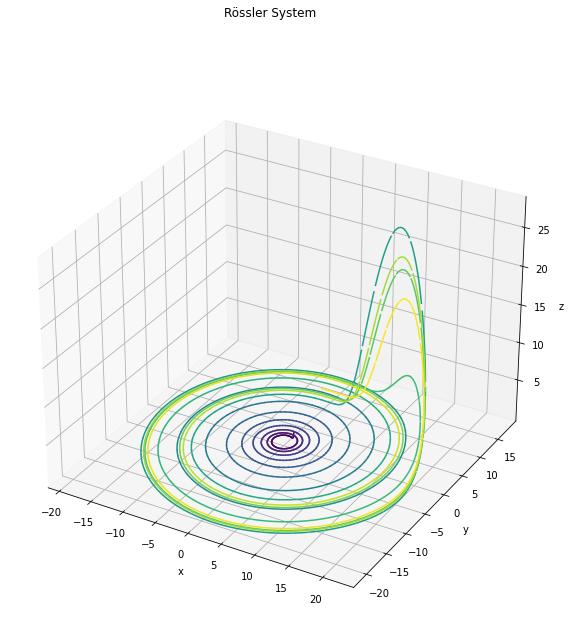

In [10]:
fig = plt.figure(figsize=[10,10])
fig.suptitle("Rössler System")
ax = fig.add_subplot(projection='3d')
ax.set(xlabel='x',ylabel='y',zlabel='z')
j = 10

viridis = cm.get_cmap('viridis', N).colors

for i in range(0,N,j):
    ax.plot(r[i:i+j,0],r[i:i+j,1],r[i:i+j,2],color=viridis[i])


In [11]:
! mkdir -p data
np.save("./data/rossler_r",r)
np.save("./data/rossler_t",t)

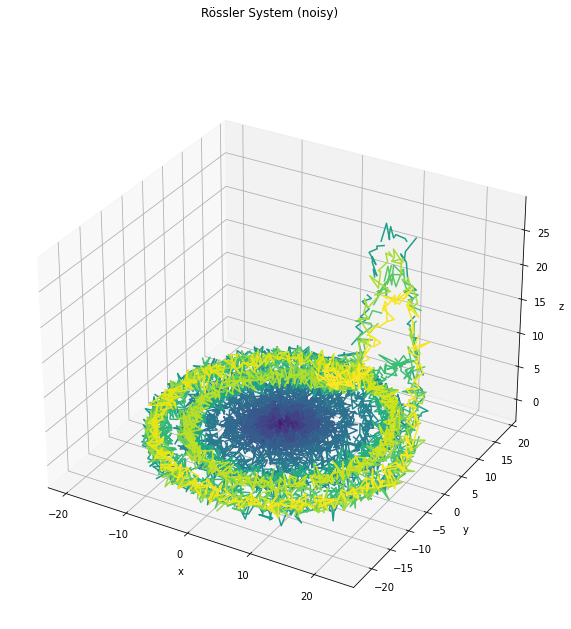

In [12]:
# NOISY SYSTEM

noise_scale = 0.7
r_noisy = r + np.random.normal(0,noise_scale,size=r.shape)

fig = plt.figure(figsize=[10,10])
fig.suptitle("Rössler System (noisy)")
ax = fig.add_subplot(projection='3d')
ax.set(xlabel='x',ylabel='y',zlabel='z')
j = 10

viridis = cm.get_cmap('viridis', N).colors

for i in range(0,N,j):
    ax.plot(r_noisy[i:i+j,0],r_noisy[i:i+j,1],r_noisy[i:i+j,2],color=viridis[i])

In [13]:
! mkdir -p data
np.save("./data/rossler_r_noisy",r)

## "Adiabatic" transforming system

Now imagine we have a differential equations system whose parameters $\boldsymbol{\Lambda} = \boldsymbol{\Lambda}(t)$ slowly evolve through time. Let's also suppose that these parameters start out in such a way that the resulting system is a Rössler system , and the final one is a Lorenz system:

$$
\begin{bmatrix}
\frac{\partial x}{\partial t} \\
\frac{\partial y}{\partial t} \\
\frac{\partial z}{\partial t}
\end{bmatrix}
=
\boldsymbol{\Lambda}(t)
\begin{bmatrix}
1 \\
x \\
y \\
z \\
xy \\
yz \\
zx
\end{bmatrix}
=

\begin{bmatrix}
\lambda_{x,1} (t) & \lambda_{x,x} (t) & \lambda_{x,y} (t) & \lambda_{x,z} (t) & \lambda_{x,xy}(t) & \lambda_{x,yz}(t) & \lambda_{x,zx}(t) \\
\lambda_{y,1} (t) &\lambda_{y,x} (t) & \lambda_{y,y} (t) & \lambda_{y,z} (t) & \lambda_{y,xy}(t) & \lambda_{y,yz}(t) & \lambda_{y,zx}(t)\\
\lambda_{z,1} (t) &\lambda_{z,x} (t) & \lambda_{z,y} (t) & \lambda_{z,z} (t) &  \lambda_{z,xy}(t) & \lambda_{z,yz}(t) & \lambda_{z,zx}(t) 
\end{bmatrix}

\begin{bmatrix}
1 \\
x \\
y \\
z \\
xy \\
yz \\
zx
\end{bmatrix}
$$

with 

$$
\boldsymbol{\Lambda}(0) = 
\begin{bmatrix}
0&0  & -1  & -1 & 0 & 0 & 0 \\
0&1 & a  & 0 & 0 & 0 & 0\\
b&0 & 0 & -c & 0 & 0 & 1 
\end{bmatrix}
$$


The parametrization at time $T$ will be

$$
\boldsymbol{\Lambda}(T) = 
\begin{bmatrix}
0&-\sigma  & \sigma  & 0 & 0 & 0 & 0 \\
0&\rho & -1  & -\rho & 0 & 0 & 0\\
0&0 & 0 & -\beta & 1 & 0 & 0 
\end{bmatrix}
$$

Finally, we let this change be linear with time, i.e.:

$$
\boldsymbol{\Lambda}(t) = \boldsymbol{\Lambda}(0) + \frac{\boldsymbol{\Lambda}(T) - \boldsymbol{\Lambda}(0)}{T} t
$$


The goal is to later feed time windowed subsets of this system to the SINDy algorithm and evaluate the tradeoff on the uncertainty between a large and a small time window.

In [14]:
def lt(t,l0,lT,T):
    #print((l0 + t*(lT-l0)/T).shape)
    return (lT + t*(l0-lT)/T)

# now we define the initial parametrization corresponding to the rossler system

a = 0.1
b = 0.1
c = 14.

lT = np.array([
    [0.,0.,-1.,-1.,0.,0.,0.],
    [0.,1.,a,0.,0.,0.,0.],
    [b,0.,0.,-c,0.,0.,1.]
])


# and the final parametrization

sigma = 10
rho = 28
beta = 8/3

l0 = np.array([
    [0.,-sigma,sigma,0.,0.,0.,0.],
    [0.,rho,-1.,-rho,0.,0.,0.],
    [0.,0.,0.,-beta,1.,0.,0.]
])


Tad = T


In [15]:
def linear_adiabatic_system(r,t,l0,lT,T):
    """
    Function to implement the adiabatic-transforming system of differential equation.  
    Arguments:
    r : array of 3 floats representing (x,y,z)
    t : float for time value
    l0 : np.array() shaped like (3,7) representing the initial parametrization
    lT : np.array() shaped like (3,7) representing the final parametrization
    T : transformation time duration
    Returns:
    drdt : velocity vector
    """
    
    vec = np.array([1.,r[0],r[1],r[2],r[0]*r[1],r[1]*r[2],r[2]*r[0]])

    #print(lt(t,l0,lT,T) @ vec)
    return (lt(t,l0,lT,T) @ vec)


In [16]:
#lambda(0) (Rossler system)
lt(t[0],l0,lT,T)

array([[  0. ,   0. ,  -1. ,  -1. ,   0. ,   0. ,   0. ],
       [  0. ,   1. ,   0.1,   0. ,   0. ,   0. ,   0. ],
       [  0.1,   0. ,   0. , -14. ,   0. ,   0. ,   1. ]])

In [17]:
#lambda(T) (Lorentz system)
lt(t[-1],l0,lT,T)

array([[  0.        , -10.        ,  10.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,  28.        ,  -1.        , -28.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  -2.66666667,
          1.        ,   0.        ,   0.        ]])

In [18]:
#r0 = np.random.random(3)
r0 = np.ones(3)
#r0 = np.zeros(3)

N = 10000
T = 100

Tad = T*100

t = np.linspace(0,T,N)

r,info = odeint(linear_adiabatic_system,r0,t,args=(l0,lT,Tad),full_output=1) # output is like (N,3)

In [19]:
r

array([[  1.        ,   1.        ,   1.        ],
       [  0.98056167,   1.01090845,   0.87893569],
       [  0.96215125,   1.02163861,   0.7724955 ],
       ...,
       [-10.96372683,  -4.50975368,   0.0215084 ],
       [-10.91222662,  -4.65281567,   0.02211749],
       [-10.8595129 ,  -4.79534755,   0.02272043]])

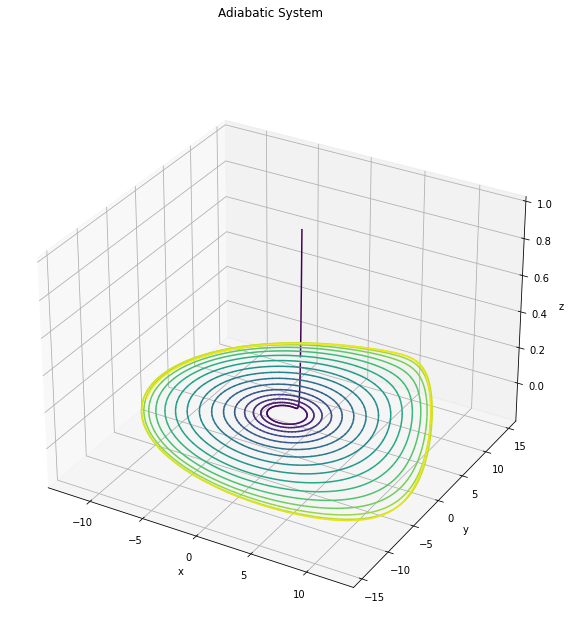

In [20]:
fig = plt.figure(figsize=[10,10])
fig.suptitle("Adiabatic System")
ax = fig.add_subplot(projection='3d')
ax.set(xlabel='x',ylabel='y',zlabel='z')
j = 10

viridis = cm.get_cmap('viridis', N).colors

for i in range(0,N,j):
    ax.plot(r[i:i+j,0],r[i:i+j,1],r[i:i+j,2],color=viridis[i])


In [21]:
! mkdir -p data
np.save("./data/adiabatic_r",r)
np.save("./data/adiabatic_t",t)

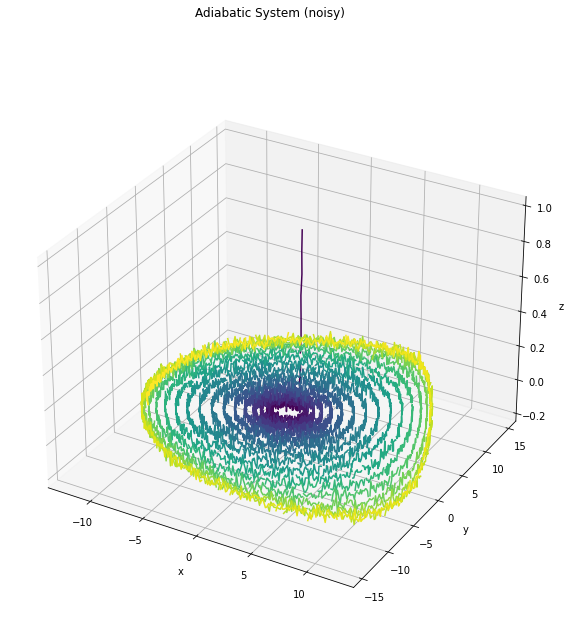

In [22]:
# NOISY SYSTEM

noise_scale = 0.02
r_noisy = r + np.random.normal(0,noise_scale,size=r.shape)

fig = plt.figure(figsize=[10,10])
fig.suptitle("Adiabatic System (noisy)")
ax = fig.add_subplot(projection='3d')
ax.set(xlabel='x',ylabel='y',zlabel='z')
j = 10

viridis = cm.get_cmap('viridis', N).colors

for i in range(0,N,j):
    ax.plot(r_noisy[i:i+j,0],r_noisy[i:i+j,1],r_noisy[i:i+j,2],color=viridis[i])

In [23]:
! mkdir -p data
np.save("./data/adiabatic_r_noisy",r)

## "Switch" system

In [24]:
N = 10000
T = 100

t = np.linspace(0,T,N)

In [25]:
sigma = 10
rho = 28
beta = 8/3

r0_lorentz = np.ones(3)

r_lorentz,info = odeint(lorenz,r0_lorentz,t,args=(sigma,rho,beta),full_output=True) 

In [26]:
a=0.1
b=0.1
c=14.

r0_rossler=r_lorentz[-1]

r_rossler,info = odeint(rossler,r0_rossler,t,args=(a,b,c),full_output=True) 

In [27]:
r_switch=np.concatenate((r_lorentz,r_rossler),axis=0)
t_switch=np.linspace(0,2*T,2*N)

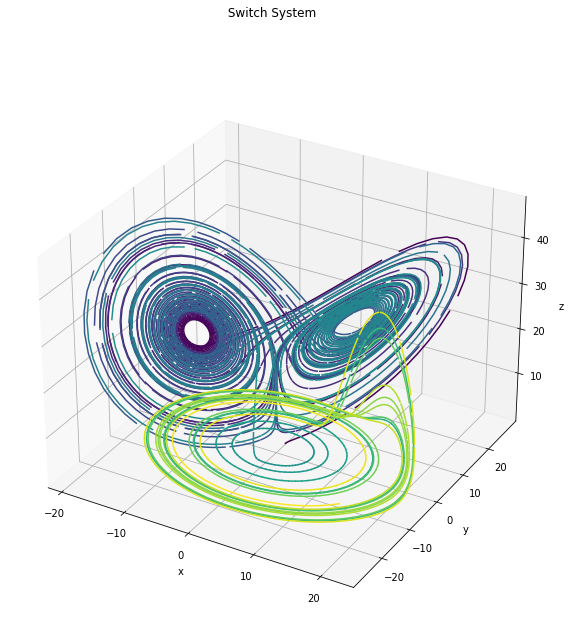

In [28]:
fig = plt.figure(figsize=[10,10])
fig.suptitle(" Switch System")
ax = fig.add_subplot(projection='3d')
ax.set(xlabel='x',ylabel='y',zlabel='z')
j = 10

viridis = cm.get_cmap('viridis', N*2).colors

for i in range(0,N*2,j):
    ax.plot(r_switch[i:i+j,0],r_switch[i:i+j,1],r_switch[i:i+j,2],color=viridis[i])


In [29]:
! mkdir -p data
np.save("./data/switch_r",r_switch)
np.save("./data/switch_t",t_switch)

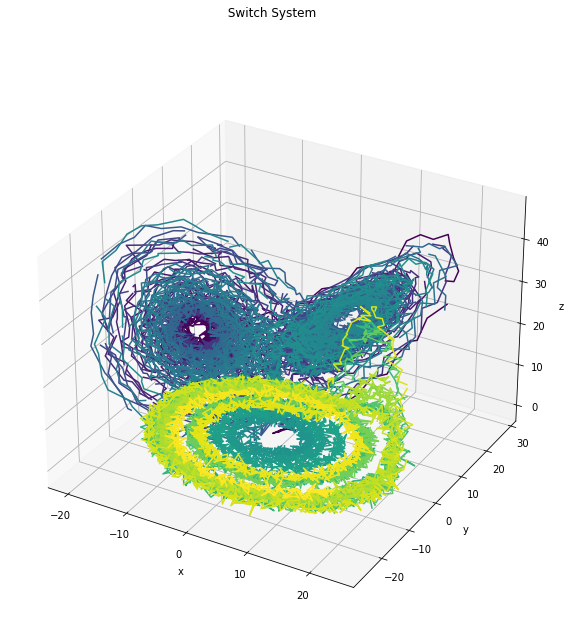

In [30]:
# NOISY SYSTEM

noise_scale = 0.7
r_noisy_switch = r_switch + np.random.normal(0,noise_scale,size=r_switch.shape)

fig = plt.figure(figsize=[10,10])
fig.suptitle(" Switch System")
ax = fig.add_subplot(projection='3d')
ax.set(xlabel='x',ylabel='y',zlabel='z')
j = 10

viridis = cm.get_cmap('viridis', N*2).colors

for i in range(0,N*2,j):
    ax.plot(r_noisy_switch[i:i+j,0],r_noisy_switch[i:i+j,1],r_noisy_switch[i:i+j,2],color=viridis[i])

In [31]:
! mkdir -p data
np.save("./data/switch_r_noisy",r_noisy_switch)